In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [11]:
PATH_TO_CSV = "../data/raw/raw_cleaned/final_test.csv"

In [12]:
#Load dataset
df = pd.read_csv(PATH_TO_CSV)
df.columns = df.columns.str.strip()  # remove extra spaces in column names


In [13]:
# Columns to check
columns_to_check = ['age', 'rate']

In [14]:
# Ensure numeric
for col in columns_to_check:
    df[col] = pd.to_numeric(df[col], errors='coerce')

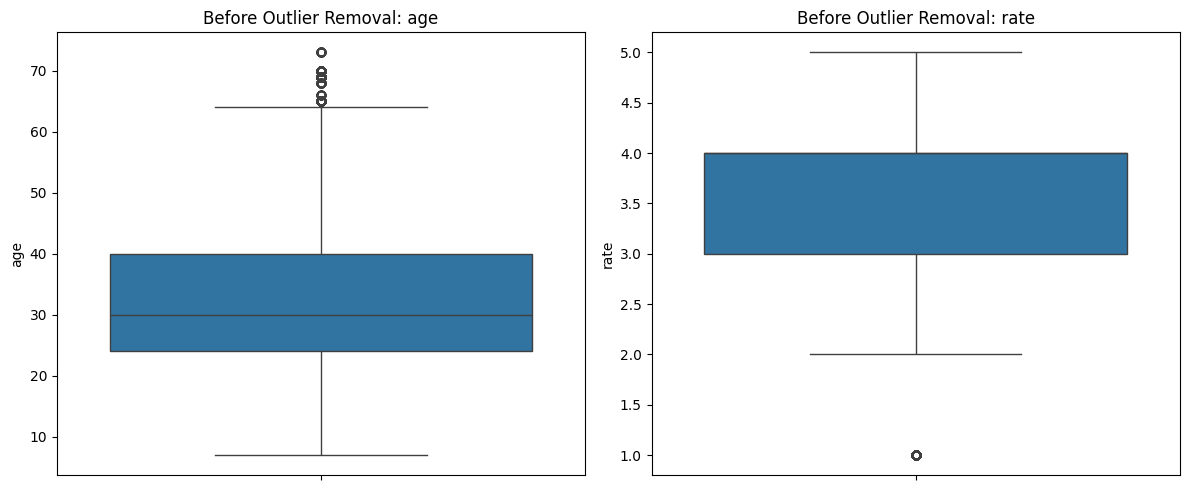

In [15]:
#Boxplots BEFORE outlier removal 
plt.figure(figsize=(12,5))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(y=df[col].dropna())  # drop NaN for plotting
    plt.title(f'Before Outlier Removal: {col}')
plt.tight_layout()
plt.show()

In [16]:
#Detect and remove outliers
def detect_outliers_iqr(df, col):
    temp_col = df[col].dropna()  # ignore NaN
    Q1 = temp_col.quantile(0.25)
    Q3 = temp_col.quantile(0.75)
    IQR = Q3 - Q1
    return temp_col.index[(temp_col < Q1 - 1.5*IQR) | (temp_col > Q3 + 1.5*IQR)]

df_cleaned = df.copy()
for col in columns_to_check:
    outliers = detect_outliers_iqr(df_cleaned, col)
    df_cleaned = df_cleaned.drop(outliers, axis=0)


    print(f"After outlier removal: {len(df_cleaned)}")
print(f"Rows removed: {len(df) - len(df_cleaned)}")

After outlier removal: 99289
After outlier removal: 93206
Rows removed: 6794


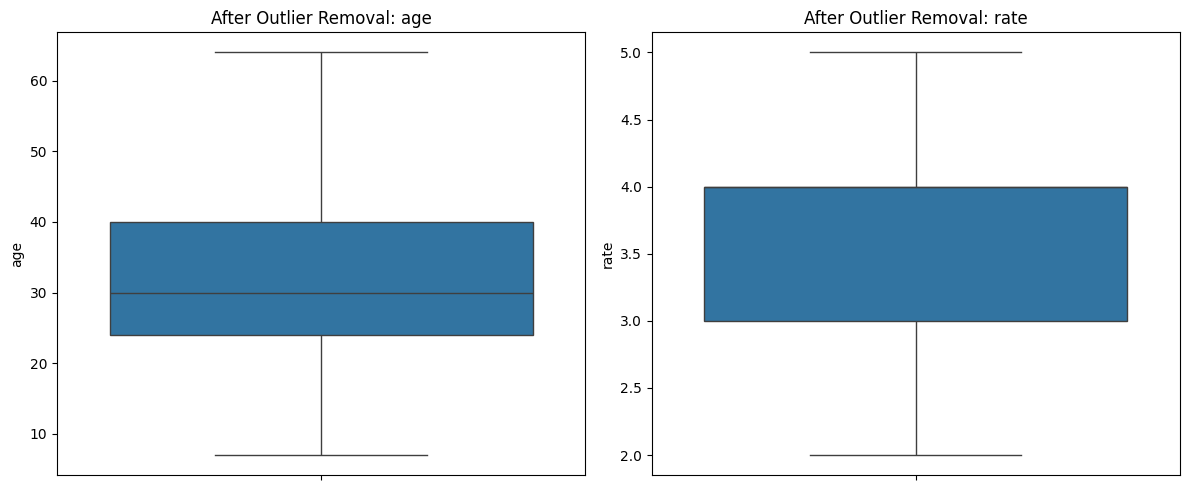

In [17]:
#Boxplots AFTER outlier removal 
plt.figure(figsize=(12,5))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(y=df_cleaned[col].dropna())  # drop NaN for plotting
    plt.title(f'After Outlier Removal: {col}')
plt.tight_layout()
plt.show()

In [18]:
#Save Cleaned Dataset
df_cleaned.to_csv(PATH_TO_CSV, index=False)
print(f"Cleaned dataset saved as '{PATH_TO_CSV}'")

Cleaned dataset saved as '../data/raw/raw_cleaned/final_test.csv'
